In [1]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv(
    r"D:\Docs\My Projects\Kaggle\Notebooks\Heart Diseases (Tabular_data)\Heart_Disease_Prediction.csv")
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
from pycaret.classification import *
clf1 = setup(data, target='Heart Disease', session_id=123,
             log_experiment=True, experiment_name='test1')

,Description,Value
0,Session id,123
1,Target,Heart Disease
2,Target type,Binary
3,Target mapping,"Absence: 0, Presence: 1"
4,Original data shape,"(270, 14)"
5,Transformed data shape,"(270, 14)"
6,Transformed train set shape,"(189, 14)"
7,Transformed test set shape,"(81, 14)"
8,Numeric features,13
9,Preprocess,True


2024/03/18 22:33:37 INFO mlflow.tracking.fluent: Experiment with name 'test1' does not exist. Creating a new experiment.


In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8626,0.0000,0.8626,0.8804,0.8584,0.7165,0.7359,0.0050
lda,Linear Discriminant Analysis,0.8626,0.0000,0.8626,0.8804,0.8584,0.7165,0.7359,0.0050
lr,Logistic Regression,0.8520,0.0000,0.8520,0.8694,0.8482,0.6959,0.7145,0.3140
rf,Random Forest Classifier,0.8468,0.0000,0.8468,0.8642,0.8424,0.6849,0.7038,0.0200
et,Extra Trees Classifier,0.8415,0.0000,0.8415,0.8542,0.8390,0.6756,0.6898,0.0160
catboost,CatBoost Classifier,0.8415,0.0000,0.8415,0.8529,0.8393,0.6761,0.6887,0.3290
qda,Quadratic Discriminant Analysis,0.8257,0.0000,0.8257,0.8401,0.8226,0.6433,0.6590,0.0050
nb,Naive Bayes,0.8152,0.0000,0.8152,0.8346,0.8105,0.6245,0.6427,0.0050
xgboost,Extreme Gradient Boosting,0.7994,0.0000,0.7994,0.8059,0.7964,0.5886,0.5972,0.0190
lightgbm,Light Gradient Boosting Machine,0.7939,0.0000,0.7939,0.8037,0.7896,0.5763,0.5890,0.0250


In [6]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.0000,0.7368,0.7350,0.7338,0.4509,0.4536
1,0.8947,0.0000,0.8947,0.8947,0.8947,0.7841,0.7841
2,0.8947,0.0000,0.8947,0.9109,0.8916,0.7765,0.7966
3,0.8421,0.0000,0.8421,0.8759,0.8334,0.6587,0.7008
4,0.9474,0.0000,0.9474,0.9532,0.9477,0.8939,0.8989
5,0.9474,0.0000,0.9474,0.9526,0.9474,0.8950,0.9000
6,0.8421,0.0000,0.8421,0.8468,0.8421,0.6851,0.6889
7,0.7895,0.0000,0.7895,0.7895,0.7895,0.5778,0.5778
8,0.7368,0.0000,0.7368,0.8246,0.7126,0.4571,0.5443


In [7]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5789,0.0000,0.5789,0.5965,0.5813,0.1648,0.1685
1,0.7895,0.0000,0.7895,0.7895,0.7895,0.5682,0.5682
2,0.7895,0.0000,0.7895,0.7895,0.7895,0.5682,0.5682
3,0.7368,0.0000,0.7368,0.7504,0.7223,0.4311,0.4587
4,0.6842,0.0000,0.6842,0.7419,0.6807,0.3936,0.4303
5,0.8421,0.0000,0.8421,0.8816,0.8395,0.6885,0.7246
6,0.7368,0.0000,0.7368,0.7409,0.7368,0.4751,0.4778
7,0.5263,0.0000,0.5263,0.5239,0.5237,0.0447,0.0449
8,0.6842,0.0000,0.6842,0.6892,0.6788,0.3596,0.3680


In [8]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8684,0.0000,0.8684,0.8759,0.8664,0.7293,0.7392
1,0.8684,0.0000,0.8684,0.8759,0.8664,0.7293,0.7392
2,0.8684,0.0000,0.8684,0.8702,0.8687,0.7354,0.7364
3,0.7632,0.0000,0.7632,0.7626,0.7623,0.5183,0.5191
4,0.8378,0.0000,0.8378,0.8395,0.8361,0.6647,0.6688
Mean,0.8413,0.0000,0.8413,0.8448,0.8400,0.6754,0.6805
Std,0.0408,0.0000,0.0408,0.0433,0.0407,0.0827,0.0851


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [13]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.0000,0.7368,0.7350,0.7338,0.4509,0.4536
1,0.8947,0.0000,0.8947,0.8947,0.8947,0.7841,0.7841
2,0.8947,0.0000,0.8947,0.9109,0.8916,0.7765,0.7966
3,0.8421,0.0000,0.8421,0.8759,0.8334,0.6587,0.7008
4,0.8947,0.0000,0.8947,0.9158,0.8953,0.7912,0.8090
5,0.9474,0.0000,0.9474,0.9526,0.9474,0.8950,0.9000
6,0.8947,0.0000,0.8947,0.8947,0.8947,0.7889,0.7889
7,0.7895,0.0000,0.7895,0.7895,0.7895,0.5778,0.5778
8,0.7895,0.0000,0.7895,0.8496,0.7769,0.5682,0.6299


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [14]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.0000,0.8421,0.8434,0.8403,0.6705,0.6746
1,0.9474,0.0000,0.9474,0.9518,0.9468,0.8902,0.8956
2,0.8947,0.0000,0.8947,0.9109,0.8916,0.7765,0.7966
3,0.8421,0.0000,0.8421,0.8759,0.8334,0.6587,0.7008
4,0.8947,0.0000,0.8947,0.8947,0.8947,0.7841,0.7841
5,0.8947,0.0000,0.8947,0.9139,0.8942,0.7912,0.8090
6,0.8421,0.0000,0.8421,0.8451,0.8412,0.6816,0.6854
7,0.6842,0.0000,0.6842,0.6892,0.6788,0.3596,0.3680
8,0.7895,0.0000,0.7895,0.8496,0.7769,0.5682,0.6299


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [15]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7368,0.0000,0.7368,0.7504,0.7223,0.4311,0.4587
1,0.7895,0.0000,0.7895,0.8094,0.7906,0.5824,0.5955
2,0.8421,0.0000,0.8421,0.8434,0.8403,0.6705,0.6746
3,0.7895,0.0000,0.7895,0.7962,0.7832,0.5529,0.5673
4,0.7368,0.0000,0.7368,0.7745,0.7368,0.4865,0.5114
5,0.8421,0.0000,0.8421,0.8816,0.8395,0.6885,0.7246
6,0.8421,0.0000,0.8421,0.8468,0.8421,0.6851,0.6889
7,0.7368,0.0000,0.7368,0.7591,0.7277,0.4633,0.4893
8,0.7895,0.0000,0.7895,0.8496,0.7769,0.5682,0.6299


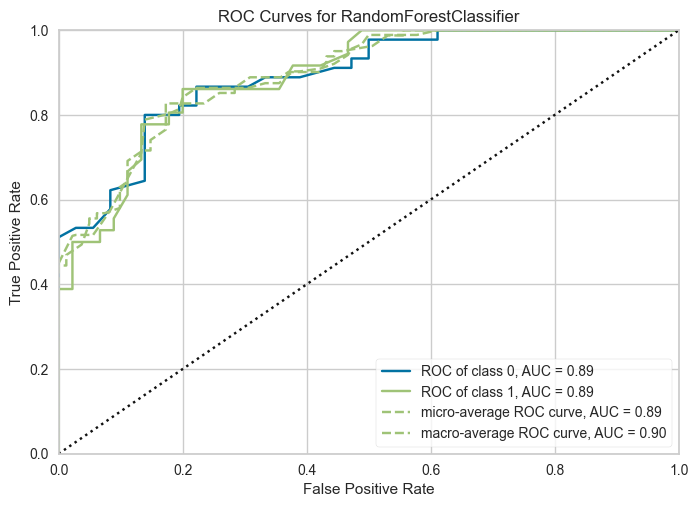

In [16]:
plot_model(rf)

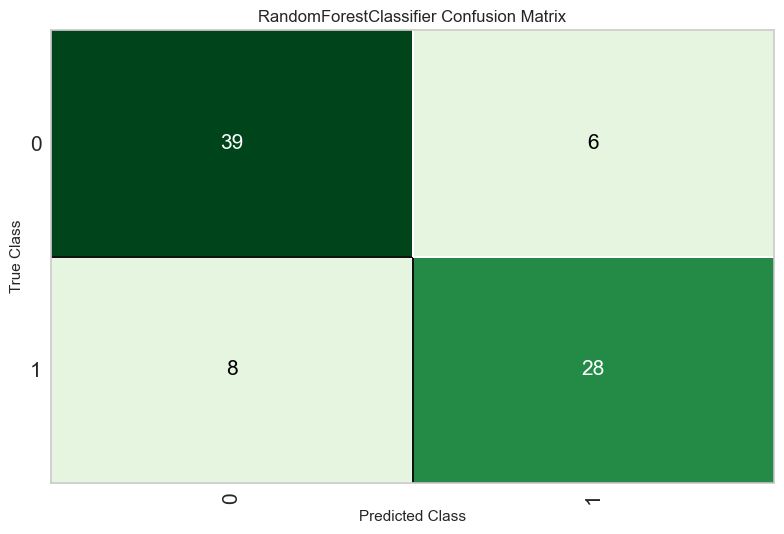

In [17]:
plot_model(rf, plot='confusion_matrix')

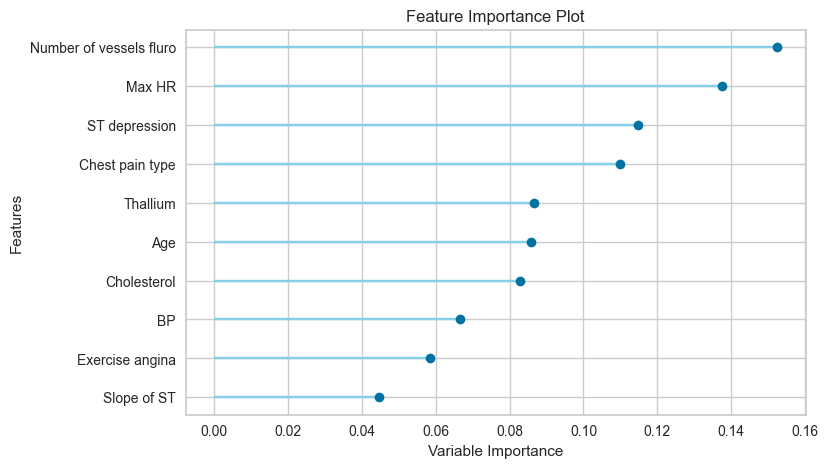

In [18]:
plot_model(rf, plot='feature')

In [19]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
catboost = create_model('catboost', cross_validation=False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.8025,0.9037,0.8025,0.8021,0.8018,0.5978,0.5985


In [24]:
best = automl(optimize='Recall')
best

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [25]:
pred_holdouts = predict_model(lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8642,0.9025,0.8642,0.8640,0.8640,0.7242,0.7245


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,prediction_label,prediction_score
155,46,0,2,105,204,0,0,172,0,0.0,1,0,3,Absence,Absence,0.9890
135,46,0,3,142,177,0,2,160,1,1.4,3,0,3,Absence,Absence,0.8194
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence,Presence,0.9224
180,42,1,3,120,240,1,0,194,0,0.8,3,0,7,Absence,Absence,0.7653
240,68,1,3,180,274,1,2,150,1,1.6,2,0,7,Presence,Presence,0.5752


In [26]:
new_data = data.copy()
new_data.drop(['Heart Disease'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,prediction_label
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Presence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Absence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Presence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [27]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Sex', 'Chest pain type',
                                              'BP', 'Cholesterol',
                                              'FBS over 120', 'EKG results',
                                              'Max HR', 'Exercise angina',
                                              'ST depression', 'Slope of ST',
                                              'Number of vessel...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('clean_column_names',
                  Tran

In [28]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\idirt\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Sex', 'Chest pain type',
                                             'BP', 'Cholesterol',
                                             'FBS over 120', 'EKG results',
                                             'Max HR', 'Exercise angina',
                                             'S...
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper